In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, pi, degrees, radians, sqrt


In [2]:
phi = [x/50*pi for x in range(-50, 51)]

In [3]:
h = 1
mu = 1
e = .9

In [4]:
def coord(phi, r):
    return r*np.cos(phi), r*np.sin(phi)

<IPython.core.display.Javascript object>


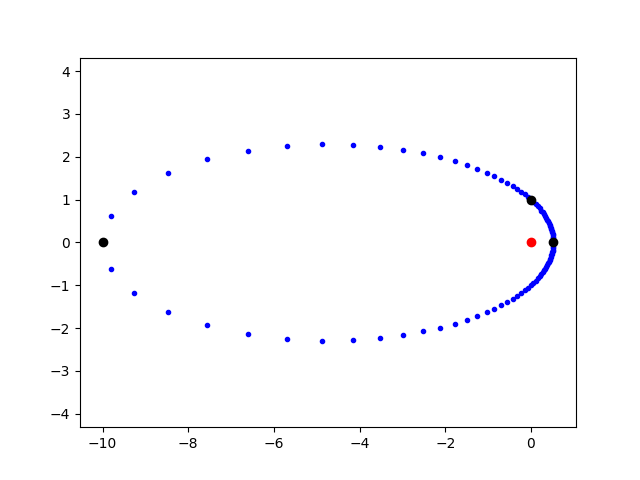

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

r = h**2/mu/(1+e*np.cos(phi))

# x = r * np.cos(phi)
# y = r * np.sin(phi)

ax.plot(*coord(phi, r), 'b.')
ax.plot(0, 0, 'ro')
ax.plot(*coord(0, h**2/mu/(1+e*np.cos(0))), 'ko')
ax.plot(*coord(pi/2, h**2/mu/(1+e*np.cos(pi/2))), 'ko')
ax.plot(*coord(pi, h**2/mu/(1+e*np.cos(pi))), 'ko')

_ = plt.axis('equal')


Hohmann Transfer

In [6]:
r1 = 1
r2 = 2
r3 = 5

e1 = 1
e2 = 1
e3 = 3

## dv1 = sqrt(2*mu*r2/(r1**2 + r1*r2)) - sqrt(mu/r1)
dv2 = sqrt(mu/r2) - sqrt(2*mu*r1/(r1*r2 + r2**2))
dv1 + dv2

Bielliptic

In [7]:
dvA = sqrt(2*mu*r3/(r1**2 + r1*r3)) - sqrt(mu/r1)
dvB = sqrt(2*mu*r2/(r2*r3 + r3**2)) - sqrt(2*mu*r1/(r1*r3 + r3**2))
dvC = sqrt(mu/r2) - sqrt(2*mu*r3/(r2**2 + r2*r3))

print(dvA, dvB, dvC)
print(dvA + dvB + dvC)
print(abs(dvA) + abs(dvB) + abs(dvC))

0.2909944487358056 0.07986281214424551 -0.138047473541969
0.2328097873380821
0.5089047344220201


In [8]:
def bielliptic(r1, r2, r3):
    dv1 = sqrt(2*mu*r2/(r1**2 + r1*r2)) - sqrt(mu/r1)
    dv2 = sqrt(mu/r2) - sqrt(2*mu*r1/(r1*r2 + r2**2))
    hohmann = dv1 + dv2
    
    dvA = sqrt(2*mu*r3/(r1**2 + r1*r3)) - sqrt(mu/r1)
    dvB = sqrt(2*mu*r2/(r2*r3 + r3**2)) - sqrt(2*mu*r1/(r1*r3 + r3**2))
    dvC = sqrt(mu/r2) - sqrt(2*mu*r3/(r2**2 + r2*r3))
    bielliptic =  abs(dvA) + abs(dvB) + abs(dvC) #  dvA + dvB + dvC
    return hohmann, bielliptic

<IPython.core.display.Javascript object>


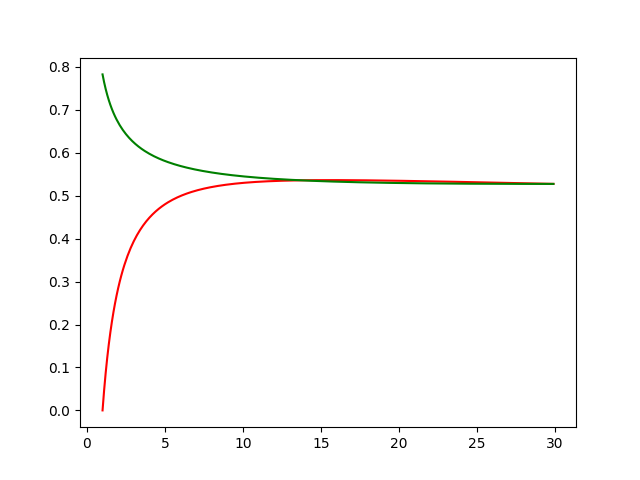

In [9]:
r1 = 1
r2 = 2
r3 = 30

values = np.arange(1, 30, .1)

h = []
b = []
for r2 in values:
    res = bielliptic(r1, r2, r3)
    h.append(res[0])
    b.append(res[1])
    
fig2 = plt.figure(2)
ax = fig2.add_subplot(1, 1, 1)
ax.plot(values, h, 'r')
ax.plot(values, b, 'g')


